<a href="https://colab.research.google.com/github/jbogarin74/Wobbles/blob/master/DASC_HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import scipy as sp
import statsmodels.api as sm 
import statistics as st

In [0]:
random_state = 42

In [10]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving mtcars.xlsx to mtcars (1).xlsx
User uploaded file "mtcars.xlsx" with length 18286 bytes


In [0]:
mt = pd.read_excel('mtcars.xlsx')

In [12]:
mt.shape

(32, 11)

In [13]:
mt.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [0]:
#Question: Relationship between miles per gallon (mpg) and 10 different automobile design variables?

In [0]:
#To what degree does the cyl variable impact mpg?

In [0]:
#To what degree does the disp variable impact mpg?

In [0]:
#To what degree does the hp variable impact mpg?

In [0]:
#To what degree does the drat variable impact mpg?

In [0]:
#To what degree does the wt variable impact mpg?

In [0]:
#To what degree does the qsec variable impact mpg?

In [0]:
#To what degree does the vs variable impact mpg?

In [0]:
#To what degree does the am variable impact mpg?

In [0]:
#To what degree does the gear variable impact mpg?

In [0]:
#To what degree does the carb variable impact mpg?

In [0]:
#Partition of the mtcars data using a 70/30 split.

In [0]:
#In addition, I generate the ramdom sample using sample() and drop() functions.

In [0]:
train_data = mt.sample(frac = 0.7) 
test_data = mt.drop(train_data.index)

In [0]:
#train_data.shape confirms 70% of data in train_data

In [15]:
train_data.shape

(22, 11)

In [0]:
#test_data.shape confirms 30% of data in test_data

In [16]:
test_data.shape

(10, 11)

In [0]:
y = train_data["mpg"]
X1 = train_data["cyl"]

In [26]:
X1 = sm.add_constant(X1)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
model1 = sm.OLS(y, X1)

In [0]:
model1_fit = model1.fit()

In [37]:
## model residuals
model_residuals = model1_fit.resid

st.mean(model_residuals)

1.6148698540002277e-16

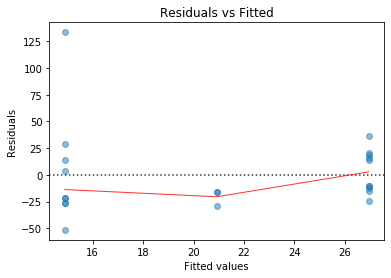

In [40]:
plot = sb.residplot(model1_fit.fittedvalues,
                    train_data.columns[3],
                    data=train_data,
                    lowess=True,
                    scatter_kws={'alpha': 0.5},
                    line_kws={'color': 'red', 'lw' : 1, 'alpha': 0.8})
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

plt.show(plot)

In [41]:
## mpg = 39.0127 - 3.0152 + E
print(model1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     51.84
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           5.70e-07
Time:                        00:40:30   Log-Likelihood:                -58.630
No. Observations:                  22   AIC:                             121.3
Df Residuals:                      20   BIC:                             123.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.0127      2.594     15.041      0.0

In [43]:
X_new = test_data['carb']
X_new = sm.add_constant(X_new)

# make the predictions by the model
test_data["predictions"] = model1_fit.predict(X_new)

test_data

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,predictions
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,26.951799
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,35.997482
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,35.997482
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,26.951799
11,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3,29.967026
22,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2,32.982254
23,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4,26.951799
28,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4,26.951799
29,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6,20.921343
31,21.4,4,121.0,109,4.11,2.780,18.60,1,1,4,2,32.982254


In [44]:
## Model 2 with 'disp' variable
X2 = train_data["disp"]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2)
model2_fit = model2.fit()
print(model2_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     54.65
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           3.86e-07
Time:                        02:14:02   Log-Likelihood:                -58.209
No. Observations:                  22   AIC:                             120.4
Df Residuals:                      20   BIC:                             122.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.4331      1.464     20.788      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [45]:
## Model 3 with 'hp' variable
X3 = train_data["hp"]
X3 = sm.add_constant(X3)
model3 = sm.OLS(y, X3)
model3_fit = model3.fit()
print(model3_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     31.81
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           1.61e-05
Time:                        02:16:13   Log-Likelihood:                -62.227
No. Observations:                  22   AIC:                             128.5
Df Residuals:                      20   BIC:                             130.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.5118      2.045     15.405      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [46]:
## Model 4 with 'drat' variable
X4 = train_data["drat"]
X4 = sm.add_constant(X4)
model4 = sm.OLS(y, X4)
model4_fit = model4.fit()
print(model4_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     33.47
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           1.16e-05
Time:                        02:17:37   Log-Likelihood:                -61.880
No. Observations:                  22   AIC:                             127.8
Df Residuals:                      20   BIC:                             129.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9198      6.137     -2.268      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [47]:
## Model 5 with 'wt' variable
X5 = train_data["wt"]
X5 = sm.add_constant(X5)
model5 = sm.OLS(y, X5)
model5_fit = model5.fit()
print(model5_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     85.59
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           1.15e-08
Time:                        02:18:51   Log-Likelihood:                -54.394
No. Observations:                  22   AIC:                             112.8
Df Residuals:                      20   BIC:                             115.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.0669      1.933     19.692      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [48]:
## Model 6 with 'qsec' variable
X6 = train_data["qsec"]
X6 = sm.add_constant(X6)
model6 = sm.OLS(y, X6)
model6_fit = model6.fit()
print(model6_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     3.080
Date:                Mon, 24 Feb 2020   Prob (F-statistic):             0.0946
Time:                        02:20:19   Log-Likelihood:                -71.121
No. Observations:                  22   AIC:                             146.2
Df Residuals:                      20   BIC:                             148.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7128     15.393     -0.371      0.7

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [49]:
## Model 7 with 'vs' variable
X7 = train_data["vs"]
X7 = sm.add_constant(X7)
model7 = sm.OLS(y, X7)
model7_fit = model7.fit()
print(model7_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     17.81
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           0.000420
Time:                        02:21:33   Log-Likelihood:                -65.690
No. Observations:                  22   AIC:                             135.4
Df Residuals:                      20   BIC:                             137.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.6727      1.515     11.002      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [50]:
## Model 8 with 'am' variable
X8 = train_data["am"]
X8 = sm.add_constant(X8)
model8 = sm.OLS(y, X8)
model8_fit = model8.fit()
print(model8_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     17.17
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           0.000503
Time:                        02:22:36   Log-Likelihood:                -65.880
No. Observations:                  22   AIC:                             135.8
Df Residuals:                      20   BIC:                             137.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.4692      1.406     12.424      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [54]:
## Model 9 with 'gear' variable
X9 = train_data["gear"]
X9 = sm.add_constant(X9)
model9 = sm.OLS(y, X9)
model9_fit = model9.fit()
print(model9_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     9.116
Date:                Mon, 24 Feb 2020   Prob (F-statistic):            0.00678
Time:                        02:25:41   Log-Likelihood:                -68.566
No. Observations:                  22   AIC:                             141.1
Df Residuals:                      20   BIC:                             143.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1728      6.743      0.174      0.8

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [53]:
## Model 10 with 'carb' variable
X10 = train_data["carb"]
X10 = sm.add_constant(X10)
model10 = sm.OLS(y, X10)
model10_fit = model10.fit()
print(model10_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     13.05
Date:                Mon, 24 Feb 2020   Prob (F-statistic):            0.00174
Time:                        02:25:01   Log-Likelihood:                -67.172
No. Observations:                  22   AIC:                             138.3
Df Residuals:                      20   BIC:                             140.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.1078      2.231     12.601      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
## Problem 5: Singel model with all 10 predictors.

In [55]:
## Model 11 with all ten variables
X11 = train_data[{"cyl","disp","hp","drat","wt","qsec","vs","am","gear","carb"}]
X11 = sm.add_constant(X11)
model11 = sm.OLS(y, X11)
model11_fit = model11.fit()
print(model11_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     11.09
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           0.000215
Time:                        02:34:27   Log-Likelihood:                -46.238
No. Observations:                  22   AIC:                             114.5
Df Residuals:                      11   BIC:                             126.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.3157     29.274     -0.557      0.5

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
